In [2]:
import numpy as np
import struct
from sklearn import neighbors, metrics
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [3]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    accuracy = np.mean(np.max(cm,axis=1))
    print('accuracy is : ',accuracy)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return accuracy

In [5]:
root = './data'
download = True

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root=root, train=True, transform=trans, download=download)
test_set = dset.MNIST(root=root, train=False, transform=trans)

In [6]:
raw_train = read_idx("data/raw/train-images-idx3-ubyte")
train_data = np.reshape(raw_train,(60000,28*28))
train_label = read_idx("data/raw/train-labels-idx1-ubyte")

raw_test = read_idx("data/raw/t10k-images-idx3-ubyte")
test_data = np.reshape(raw_test,(10000,28*28))
test_label = read_idx("data/raw/t10k-labels-idx1-ubyte")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [7]:
X = train_data[:10000]
Y = train_label[:10000]
x_test = test_data[:2000]
y_true = test_label[:2000]
k_num=[1,2,3,4,5,6,7,8,9]
acc=[]

Normalized confusion matrix
accuracy is :  0.9223793409709146
Normalized confusion matrix
accuracy is :  0.9045805054932432
Normalized confusion matrix
accuracy is :  0.923233677867651
Normalized confusion matrix
accuracy is :  0.9219873132401194
Normalized confusion matrix
accuracy is :  0.9204245167312708
Normalized confusion matrix
accuracy is :  0.9197574133507823
Normalized confusion matrix
accuracy is :  0.9190387881669568
Normalized confusion matrix
accuracy is :  0.9198783220502833
Normalized confusion matrix
accuracy is :  0.9161693922160892


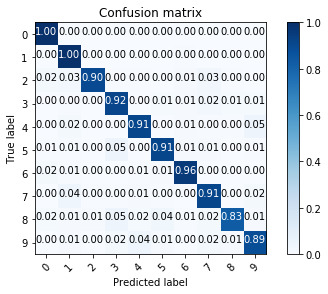

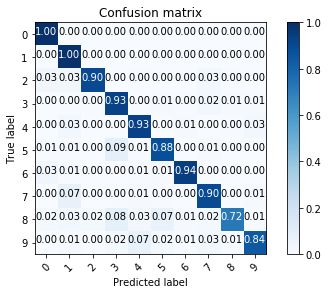

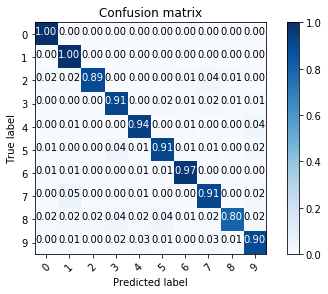

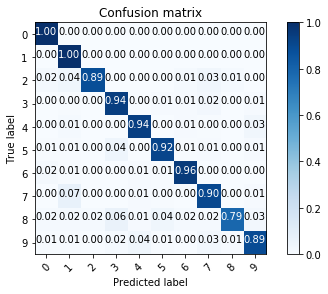

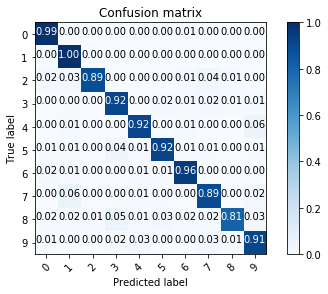

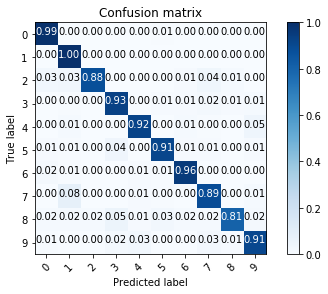

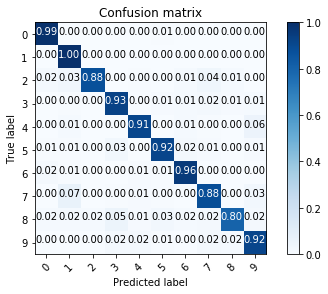

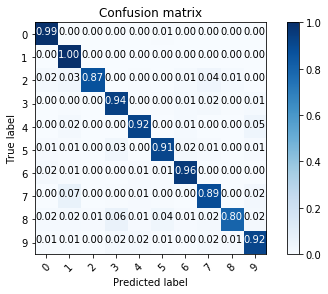

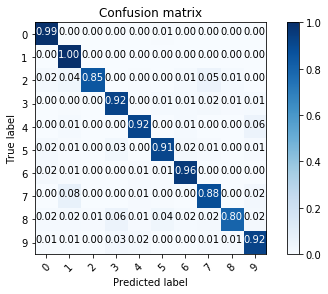

In [8]:
for k in k_num:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k).fit(X,Y)
    y_pred = knn.predict(x_test)
    cm = metrics.confusion_matrix(y_true, y_pred)
    accuracy=plot_confusion_matrix(cm, ['0','1','2','3','4','5','6','7','8','9'],normalize=True)
    acc.append(accuracy)
    plt.figure()

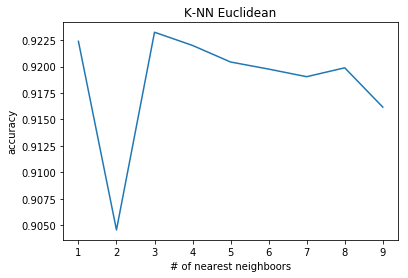

In [14]:
plt.plot(k_num,acc)
plt.title('K-NN Euclidean')
plt.xlabel('# of nearest neighboors')
plt.ylabel('accuracy')
plt.show()

In [12]:
print('best accuracy ：',max(acc))
print('Most accurate number of nearest neighboors ：',acc.index(max(acc))+1)

best accuracy ： 0.923233677867651
Most accurate number of nearest neighboors ： 3
